# EK121 Final Project, Fall 2023

*Title:*

Social Security Disability Requests Vary by Northern vs. Southern States in the USA

*Submitted Date:*

Oct. 16, 2023

-------------


*My name and Boston University email address*, as a tuple:

In [39]:
myname = ("Sophie Li", "sophiel1@bu.edu")

*My teammates' names and Boston University email addresses, as tuples:*

In [40]:
teammate1 = ("Samuel Keamy", "skeamy@bu.edu")

In [41]:
teammate2 = ("Trevor Moss", "tmoss27@bu.edu")

In [42]:
teammate3 = ()

-------------

*Summary:*

Something about Social Security Disability and why it's important. Some dataset could answer an important question for us. We used data this-or-that. Our analysis...

--insert-your-project-here--

Setup:

In [43]:
import numpy as np #numpy maybe not needed
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
# rcParams from https://matplotlib.org/stable/users/explain/customizing.html

In [44]:
data_url = "https://www.dropbox.com/s/ie1zvkr7iht2i1j/public_workingtimedata.dta?dl=1" # store data url here

df = pd.read_stata(data_url) # data is a stata file, so use read_stata to get dataframe set up
#df.to_csv('./csv.csv') # test used so we can look at raw data and as CSV instead of .dta/stata
#no real cleaning required, very nice data set. Some NaN values that will be discussed later, but largely not impactful.

### Part 1: Global Labor Trends

Our initial thought was that there must be a shift in the normal working hours from the past to now. In other words, it seems reasonable that as technology and living standards improved with time, there would be a decrease in working hours. Thus, we hypothesize that, globally, there has been a trend towards lower labor hours.

This dataset included a "normalhours" column, which is the "Normal Working Hours" we reference throughout these next few plots. These hours are based on the regulations set by each country. 

To illustrate our hypothesis, let us first examine the United States.

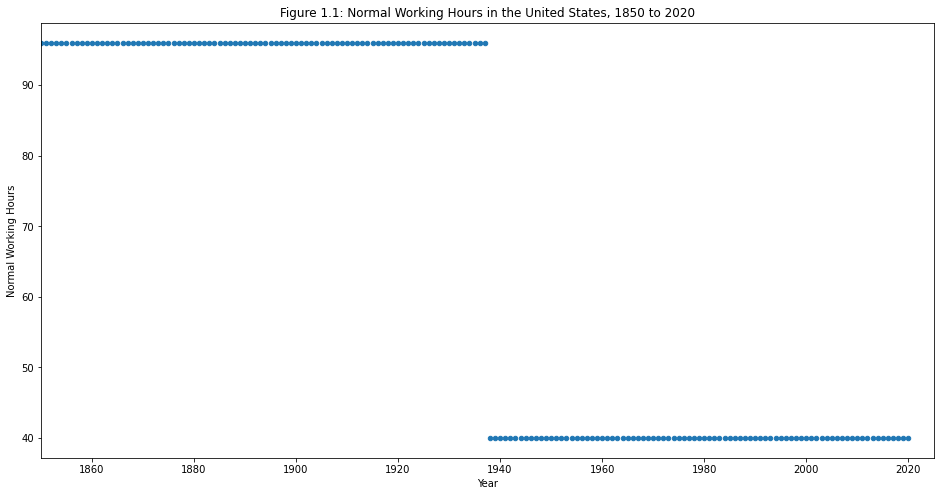

In [45]:
# Plot 1.1

df_by_year = df.sort_values(["year"]) # sort everything by year
df_US = df.loc[df['country_name'] == "United States of America"] # get only the USA labor hours data

df_US_hours = df_US[["country_name", "year", "normalhours"]] # only get these columns 
df_US_hours.plot.scatter(x="year", y="normalhours") # plot the year vs. normal working hours

plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Figure 1.1: Normal Working Hours in the United States, 1850 to 2020')
plt.xlim(1850, 2025)

plt.show()

As reflected in the plot, we can see that normal working hours in the United States changed drastically around the late 30s and early to mid 40s. There is only one major shift here, rather than a gradual trend downwards. Looking at this data, we initially thought this shift might have been caused by World War II. However, the shift in working hours occurs in 1938, which can be seen if the graph is examined closely. This is a year before the war started, so there is likely little to no connection here. While this trend matches our hypothesis, examining a single country, subject to factors the rest of the world might not be, would be irresponsible. So, we should examine all the countries in this dataset together.

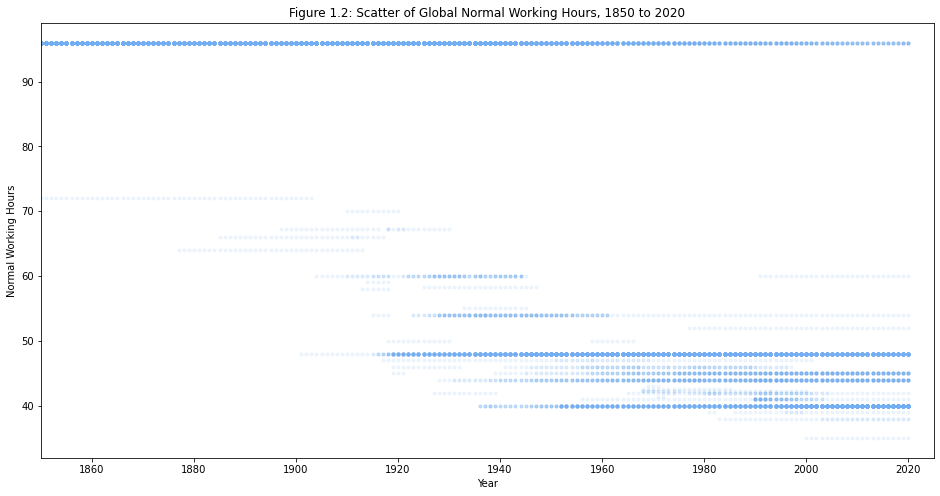

In [46]:
# Plot 1.2
pd.pivot_table(df.reset_index(), index='year', columns='country_name', values='normalhours').plot(legend=None, alpha=0.1, linestyle='None', marker='.', color="#72aef2") # https://www.statology.org/pandas-groupby-plot/

#df.plot(x='year', y='normalhours', legend=None, alpha=0.5, linestyle='None', marker='.', color="#72aef2") maybe replace?

plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Figure 1.2: Scatter of Global Normal Working Hours, 1850 to 2020')
plt.xlim(1850, 2025)

plt.show()

It is evident that there is cluster of suddenly lower Normal Working Hours beginning between 1920 and 1940. This is a smiliar trend worldwide as to plot 1.1, where normal working hours suddenly dropped around 1940. With some countries dropping pre-1940, we can again see that a single event, such as WWII, is not the main reason for this global shift in labor. Although a trend is visible, there are simply too many data points, it's hard to read! Looking at mean working hours can help clarify this.

In [47]:
#mean normal working hours in 2020 vs 1930

df_2020 = df.loc[df['year'] == 2020] # get entries in dataframe from certain years
df_1930 = df.loc[df['year'] == 1930]

#print(len(df_2020), len(df_1930)) #checking that not too many data points are lost here!

mean_hours_2020 = df_2020.loc[:, 'normalhours'].mean() #slice for normal hours column only, then take mean of this series
mean_hours_1930 = df_1930.loc[:, 'normalhours'].mean()

print(f"The mean working normal working hours (to the nearest hour) in 2020 was {mean_hours_2020:.0f}, while the mean in 1930 was {mean_hours_1930:.0f}.")

The mean working normal working hours (to the nearest hour) in 2020 was 46, while the mean in 1930 was 80.


So, the mean normal working hours decreased by 34 hours between 1930 and 2020. This matches what we see in Figure 1.2, a global trend of decreasing work hours over the past 90ish years. Neat! Work hours have clearly decreased across the board, which lines up with our hypthesis nicely.

Let's take a look at a few individual countries, just for clarity, as Figure 1.2 is a bit hard to read.

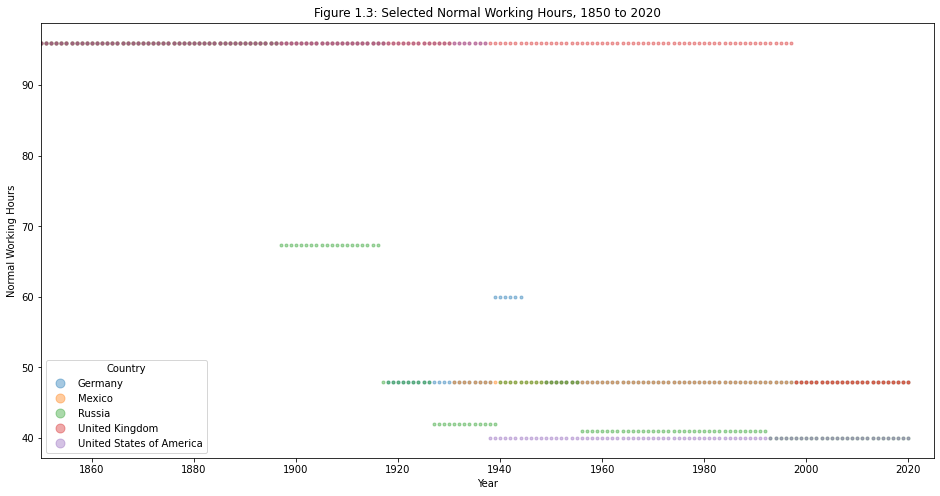

In [48]:
# Plot 1.3
#look at fewer countries here to illustrate a sort of trend more simply (like 4-6 countries)

df_select = df.loc[df['country_name'].isin(['United States of America', 'Mexico', 'Russia', 'Germany', 'United Kingdom'])]
#df_select = df.loc[df['country_name'].isin(['United Kingdom'])]

pd.pivot_table(df_select.reset_index(), index='year', columns='country_name', values='normalhours').plot(alpha=0.4, linestyle='None', marker='.')

plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Figure 1.3: Selected Normal Working Hours, 1850 to 2020')
plt.xlim(1850, 2025)
plt.legend(title="Country", loc='lower left', markerscale= 3)

plt.show()

Above is one visualization of five selected countries. We will anaylze this in a moment, but first will show them in 3D to get a clearer picture of each.

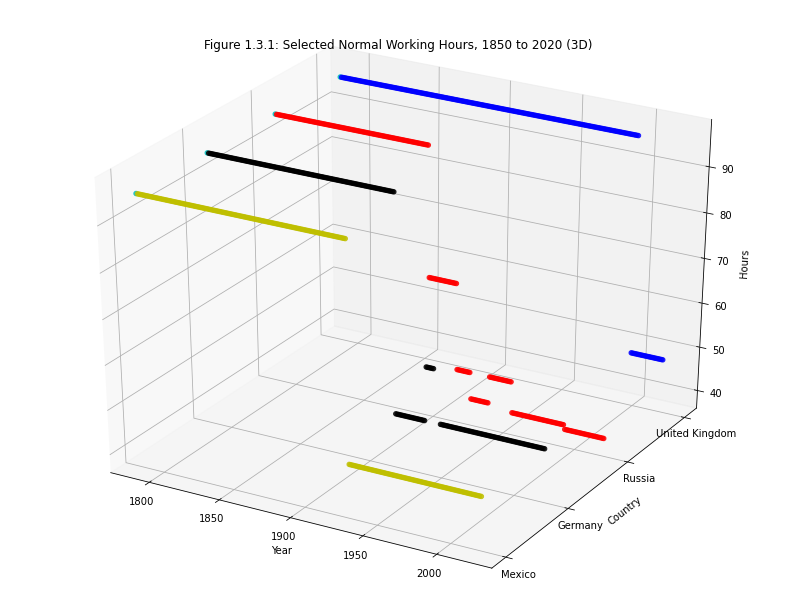

In [49]:
# Plot 1.3.1 (3D)
# https://matplotlib.org/stable/gallery/mplot3d/bars3d.html#sphx-glr-gallery-mplot3d-bars3d-py extrapolated to .scatterplot

fig = plt.figure(figsize=(14, 11))
ax = fig.add_subplot(projection='3d')
colors = ['b', 'r', 'k', 'y']
yticks = [3, 2, 1, 0]
country = ['United Kingdom', 'Russia', 'Germany', 'Mexico']

for clr, ypos, ctry in zip(colors, yticks, country):
    df_country = df.loc[df['country_name'] == ctry]

    xs = df_country['year']
    ys = ypos
    zs = df_country['normalhours']

    cs = [clr] * len(xs)
    cs[0] = 'c'

    a = ax.scatter(xs, ys, zs, color= cs, alpha= 0.8)    

ax.set_xlabel('Year')
ax.set_ylabel('Country')
ax.set_zlabel('Hours')
ax.set_yticks(yticks)
ax.set_yticklabels(['United Kingdom', 'Russia', 'Germany', 'Mexico'])

plt.title('Figure 1.3.1: Selected Normal Working Hours, 1850 to 2020 (3D)')

plt.show()

The United States of America was omitted from this graph for clarity, as Figure 1.1 focused solely on the US.

Here, we clearly see the trend in each country to lowering labor hours to the modern day. The shifts seen here are not simultaneous, perhaps indicating that countries experienced similar pressures but at different moments in history. These shifts are more localized than we initially thought, with a country like the United Kingdom setting its lower Normal Working Hours much later than others. Of these countries, most experienced shifts much earlier than this, but not all clustered around the 1940s, which is when the United States felt a similar shift. However, all these countries did indeed shift in a similar way, with each greatly reducing expected labor hours. Therefore, our hypothesis holds up for these countries, and for the wider world, given what we can observe from Figure 1.2.

Through these comparisons, we can see that working hours have generally decreased over time. This trend can be explained through a multitude of factors, not just one event. However, the lower normal work hours suggests that society has become more productive in the modern day. By looking at more specific countries, and using the expected working hours, we can identify trends from the past to predict future changes in work hours. Also, we can see how the standard of living and work culture have changed throughout time. As work hours decrease, people have experienced an increase in more time for leisure activities. Further, we can compare the work culture between different countries. For example, a country with higher normal working hours, would have higher expectations for individual workers. This could also be reflected by overtime hours, where the expectation of working overtime would increase. 

### Part 2: Overtime Hours and Compensation

We've discussed normal working hours, but what about overtime? We hypothesize there will be a similar trend to our first scenario with overtime hours, and that there is a correlation between remuneration (compensation for overtime hours) and maximum hours.

In this section, we frequently reference maximum hours and remuneration as a percentage. For reference, Max Hours = Normal Hours + Overtime Hours, and Overtime Pay = (1.00 + Overtime Remun.) ⋅ Pay.


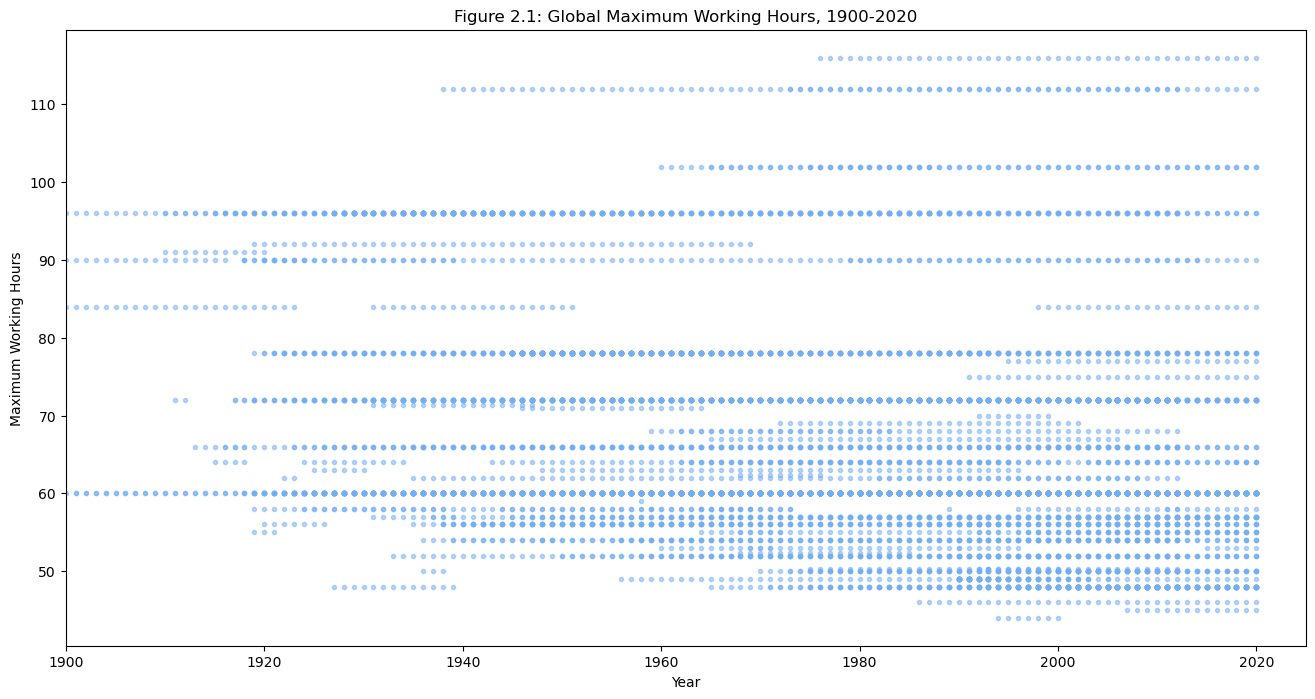

In [147]:
# Plot 2.1

df.plot(x='year',y='hours_max', legend=None, alpha=0.5, linestyle='None', marker='.', color="#72aef2") # scatter of year vs. max hours

plt.xlim(1900, 2025) # cut out values pre-1900, dataset limited in scope at this point

plt.ylabel('Maximum Working Hours')
plt.xlabel('Year')
plt.title('Figure 2.1: Global Maximum Working Hours, 1900-2020')
plt.xlim(1900, 2025)

plt.show()

In this figure, we can see that there is a faint trend, where a cluster forms on the lower right corner, signifying lower overtime hours in the more recent years. However, there is no clear trend which could be attributed to the many NaN (missing) values 'hours_max' has in the dataframe. This could easily make this data less accurate, so let's inspect how many NaN items are in this column using the code below.

In [52]:
df_hours_max_and_country = df[['country_name', 'hours_max']]
count_NaN_max_hours = 0

NaN_dict = {}
NaN_list = []

#make a dictionary of format 'country':(number of nan items)
for index, row in df_hours_max_and_country.iterrows(): #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas-dataframe-iterrows 
    if(row['hours_max'] != row['hours_max']): #check if max_hours is NaN by checking if equal to self
        count_NaN_max_hours+=1
        if(not row['country_name'] in NaN_dict.keys()):
            NaN_dict[row['country_name']] = 1
        else:
            NaN_dict[row['country_name']] += 1

for key in NaN_dict:
    NaN_list.append([key, NaN_dict[key]])

df_NaN_max_hours = pd.DataFrame(NaN_list, columns=['Country', 'NaN Max Hours']).sort_values(by='NaN Max Hours').set_index(['Country'])


print(f"There are {count_NaN_max_hours} NaN items in the 'hours_max' column, out of the total of 27192 rows!")
#df_NaN_max_hours.loc[df_NaN_max_hours['NaN Max Hours'] > 100].plot.hist()
#plt.show()



There are 15785 NaN items in the 'hours_max' column, out of the total of 27192 rows!


With so many NaN values, it's clear that any trend we see in the plot above does not reflect a completely global trend, at least at some points in time.

We can plot some of this data to check what countries have these NaN values and investigate why, though it's a bit of an uglier bar graph.

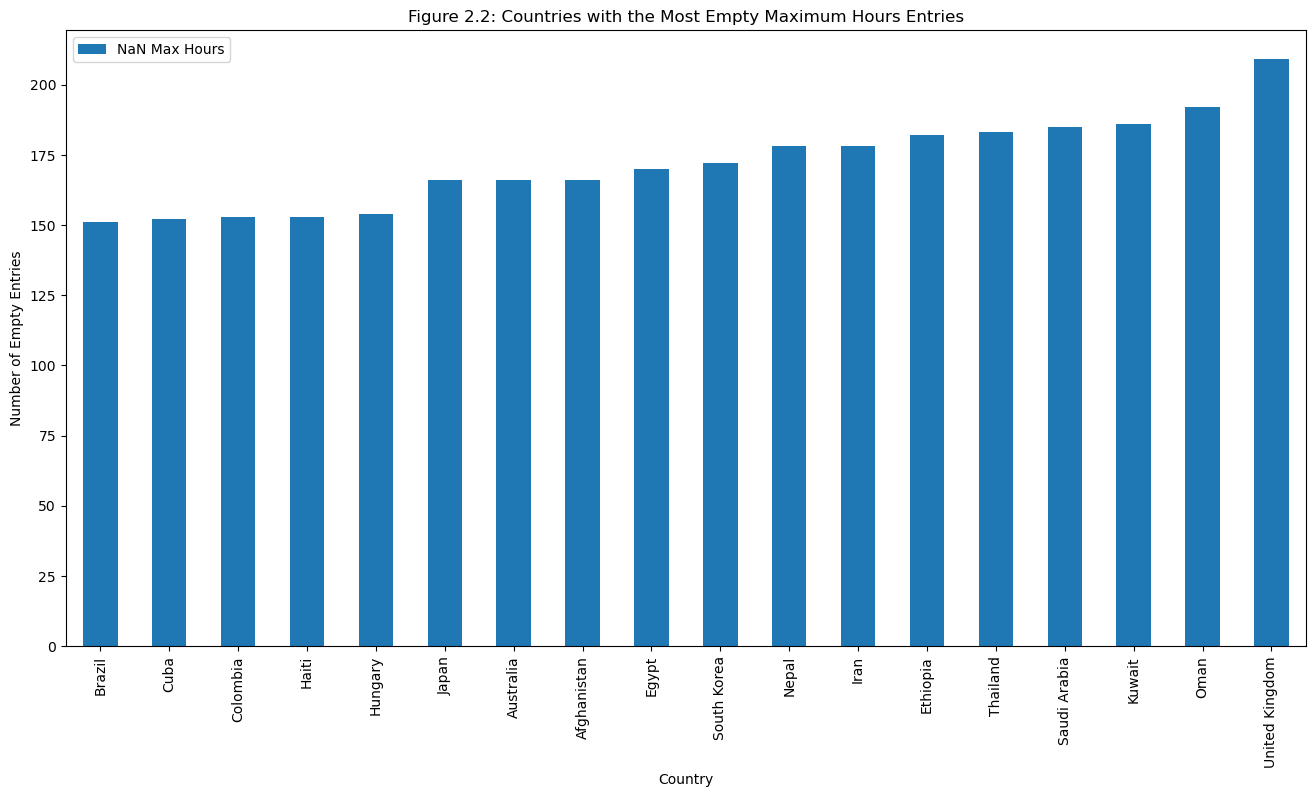

In [144]:
df_NaN_max_hours.loc[df_NaN_max_hours['NaN Max Hours'] > 150].plot.bar()

plt.title("Figure 2.2: Countries with the Most Empty Maximum Hours Entries")
plt.ylabel("Number of Empty Entries")
plt.xlabel("Country")
plt.show()

Picking some countries from this bar graph, we can see that there are various reasons for this missing data:
1. Some countries only have recent entries in the 'hours_max' column, as is the case for the United Kingdom, which only has data for 1999 onwards. This can be either because there previously weren't regulations in place or because the dataset did not include this data for some reason, or
2. The country might not have a maximum number of working hours.
3. ?

Using the data we do have, lets look at overtime compensation, referred to here as remuneration. We believe there will be a connection between overtime compensation and maximum working hours.

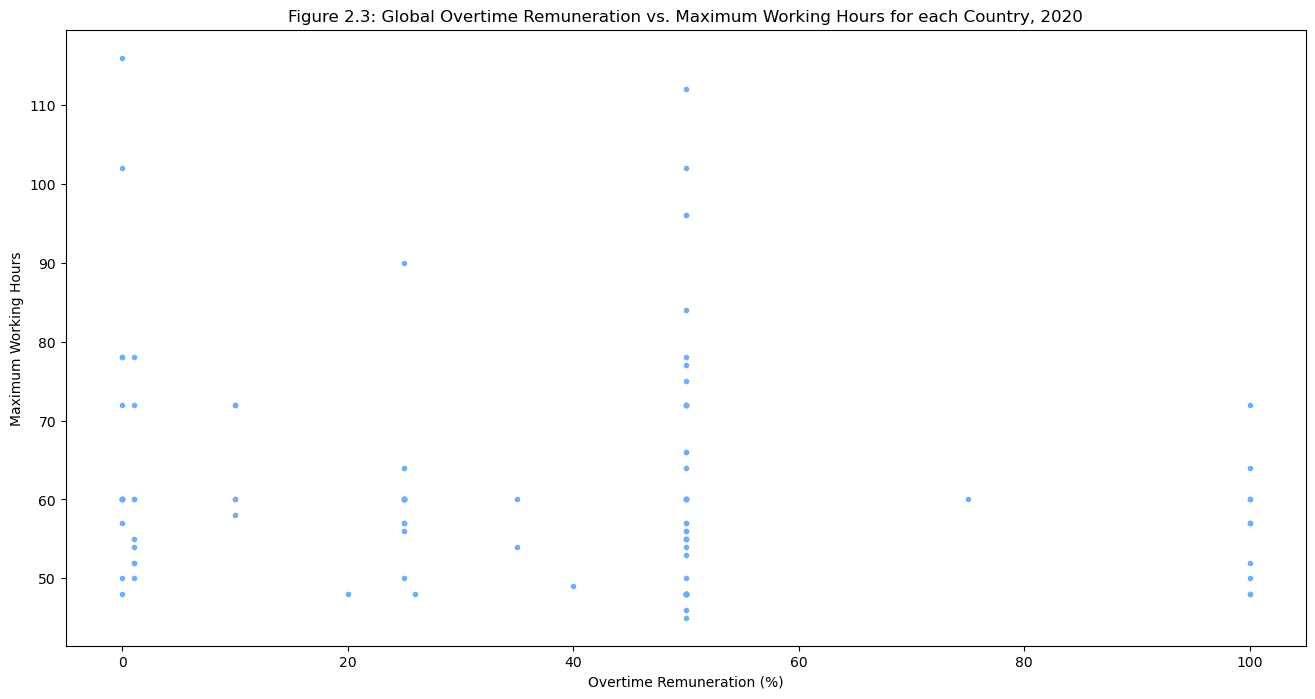

In [146]:
#overtime_remun vs hours_max


df_2020.plot(x='overtime_remun', y='hours_max', legend=None, alpha=1, linestyle='None', marker='.', color="#72aef2")

plt.title('Figure 2.3: Global Overtime Remuneration vs. Maximum Working Hours for each Country, 2020')
plt.xlabel('Overtime Remuneration (%)')
plt.ylabel('Maximum Working Hours')

plt.show()

Huh, looks like there isn't a linear/exponential connection. What we do have are a couple internationally recognized clusters (0%, 25%, 50%, 100%) that countries default to, regardless of their maximum working hours. <br>

Lets look at the time series to check if we have any correlation there.

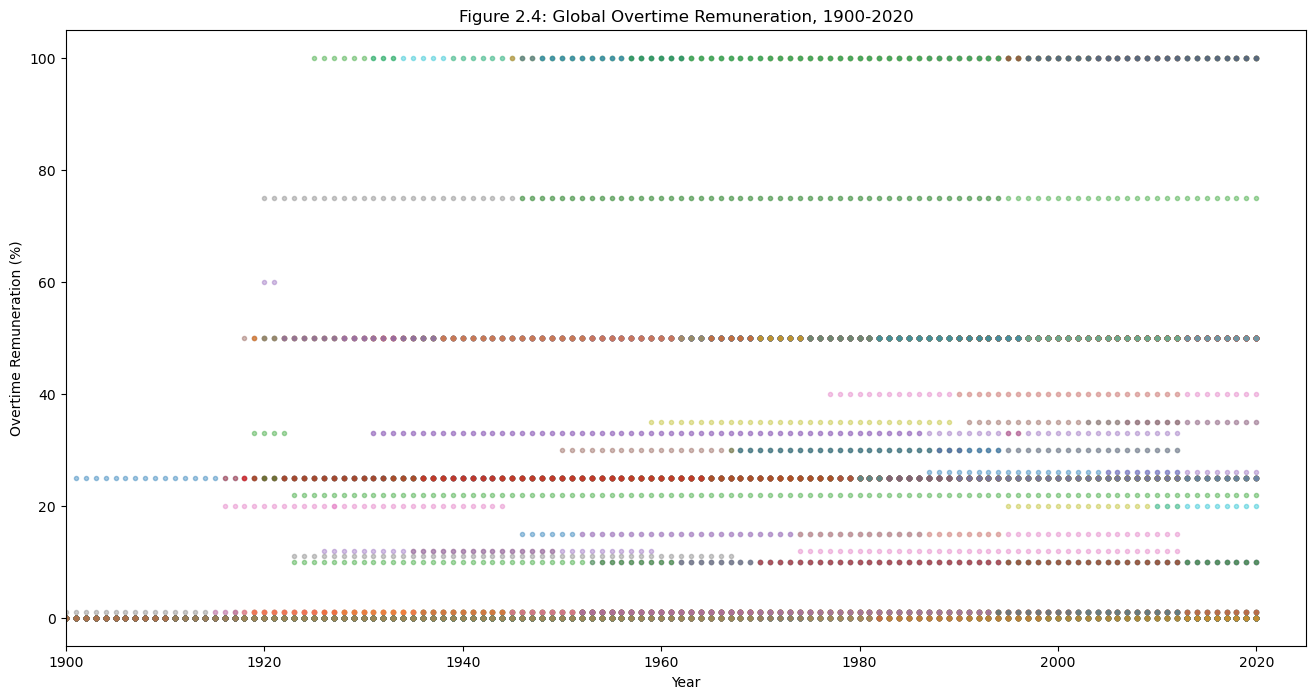

In [145]:
#overtime_renum vs. time

#df.plot(x='year', y='overtime_remun', legend=None, alpha=0.8, linestyle='None', marker='.', color="#72aef2")
pd.pivot_table(df.reset_index(), index='year', columns='country_name', values='overtime_remun').plot(alpha=0.4, linestyle='None', marker='.', legend=None)

plt.title('Figure 2.4: Global Overtime Remuneration, 1900-2020')
plt.xlabel('Year')
plt.ylabel('Overtime Remuneration (%)')
plt.xlim(1900, 2025)

plt.show()

Unfortunately not, there is no notable change in overtime compensation corresponding a major world event (the labor changes in the 1940s, the popularization of assembly lines, etc.). <br>

In fact, the overtime compensation workers recieve today is likely to be the same overtime compensation workers recieved a century ago. This warrents further exploration into the number of hours worked overtime per capita, and if our old overtime system is compensating workers fairly in the modern day.